In [3]:
import csv

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
from tqdm.notebook import tqdm

torch.manual_seed(32)

In [4]:
f = True
X = []
y = []
with open(
    "../../data/diabetes1.csv",
    newline="",
) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if f:
            print(row)
            f = False
        X.append(np.array([float(row["Age"]), float(row["Glucose"])]))
        y.append(np.intc(1 if row["Outcome"].strip().upper() == "1" else 0))
X = np.array(X)
y = np.array(y)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(len(X), 1))

{'Pregnancies': '6', 'Glucose': '148', 'BloodPressure': '72', 'SkinThickness': '35', 'Insulin': '0', 'BMI': '33.6', 'DiabetesPedigreeFunction': '0.627', 'Age': '50', 'Outcome': '1'}


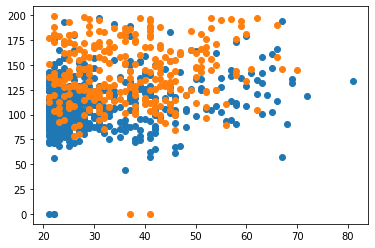

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [71]:
class Model(nn.Module):
    def __init__(self, input_size, layers, output_size):
        super().__init__()
        self.layers = []
        first = True
        for node_size in layers:
            if first:
                item = nn.Linear(input_size, layers[0])
                setattr(self, str(hash(item)), item)
                self.layers.append(item)
                previous_node_size = layers[0]
                first = False
                continue
            else:
                item = nn.Linear(previous_node_size, node_size)
                setattr(self, str(hash(item)), item)
                self.layers.append(item)
            previous_node_size = node_size
        item = nn.Linear(previous_node_size, output_size)
        setattr(self, str(hash(item)), item)
        self.layers.append(item)

    def forward(self, x):
        for layer in self.layers:
            x = torch.sigmoid(layer(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [191]:
model = Model(2, [20,20,10], 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0214, -0.3043],
        [-0.5744, -0.2134],
        [ 0.0110,  0.0784],
        [-0.6067,  0.2122],
        [-0.4422,  0.2120],
        [ 0.1795,  0.2422],
        [ 0.1990, -0.2011],
        [-0.6642, -0.3482],
        [ 0.1303,  0.2032],
        [-0.0319,  0.5276],
        [-0.0940, -0.0461],
        [ 0.6513,  0.6095],
        [-0.4859,  0.3198],
        [-0.0041, -0.2875],
        [-0.2104,  0.6729],
        [-0.5594, -0.6006],
        [ 0.1342,  0.4850],
        [ 0.2093, -0.3364],
        [ 0.2728, -0.4114],
        [ 0.4297, -0.0297]], requires_grad=True), Parameter containing:
tensor([ 0.1607, -0.3613, -0.4443, -0.0506,  0.3912, -0.5235,  0.6874,  0.3650,
         0.5366, -0.4994,  0.5018, -0.2186, -0.0169, -0.1068,  0.4817, -0.4234,
         0.5416, -0.2952, -0.2237,  0.1613], requires_grad=True), Parameter containing:
tensor([[-0.0275,  0.0082,  0.0624, -0.2181, -0.1425, -0.2135,  0.1131,  0.1006,
          0.1773,  0.0092, -0.2089,  0.0518,

In [192]:
model.layers

[Linear(in_features=2, out_features=20, bias=True),
 Linear(in_features=20, out_features=20, bias=True),
 Linear(in_features=20, out_features=10, bias=True),
 Linear(in_features=10, out_features=1, bias=True)]

In [193]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0214, -0.3043],
         [-0.5744, -0.2134],
         [ 0.0110,  0.0784],
         [-0.6067,  0.2122],
         [-0.4422,  0.2120],
         [ 0.1795,  0.2422],
         [ 0.1990, -0.2011],
         [-0.6642, -0.3482],
         [ 0.1303,  0.2032],
         [-0.0319,  0.5276],
         [-0.0940, -0.0461],
         [ 0.6513,  0.6095],
         [-0.4859,  0.3198],
         [-0.0041, -0.2875],
         [-0.2104,  0.6729],
         [-0.5594, -0.6006],
         [ 0.1342,  0.4850],
         [ 0.2093, -0.3364],
         [ 0.2728, -0.4114],
         [ 0.4297, -0.0297]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1607, -0.3613, -0.4443, -0.0506,  0.3912, -0.5235,  0.6874,  0.3650,
          0.5366, -0.4994,  0.5018, -0.2186, -0.0169, -0.1068,  0.4817, -0.4234,
          0.5416, -0.2952, -0.2237,  0.1613], requires_grad=True),
 Parameter containing:
 tensor([[-0.0275,  0.0082,  0.0624, -0.2181, -0.1425, -0.2135,  0.1131,  0.1006,
           0.1773,

In [194]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [195]:
epochs = 4000
losses = []

progress_bar = tqdm(range(epochs))
for i in progress_bar:
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    progress_bar.set_description(f"epoch: {i} loss: {loss.item()}")

  0%|          | 0/4000 [00:00<?, ?it/s]

Loss over time


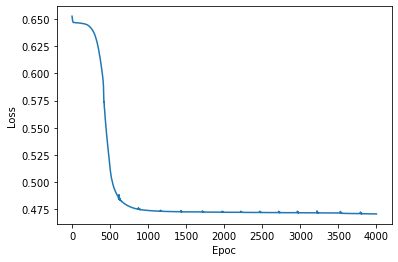

In [196]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")
print("Loss over time")

In [197]:
def plot_decision_boundry(X, y, scatter=False):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0] + 0.25))
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1] + 0.25))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    if scatter:
        plt.scatter(X[y == 0, 0], X[y == 0, 1])
        plt.scatter(X[y == 1, 0], X[y == 1, 1])

Trained Network


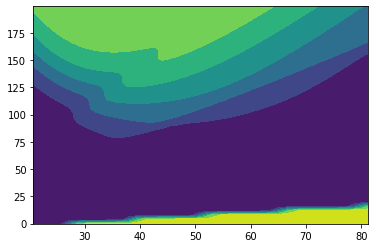

In [204]:
print("Trained Network")
plot_decision_boundry(X, y)

Trained Network With data


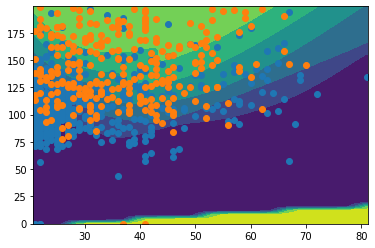

In [203]:
print("Trained Network With data")
plot_decision_boundry(X, y,scatter=True)

First Prediction, item in center of graph, group 1
0


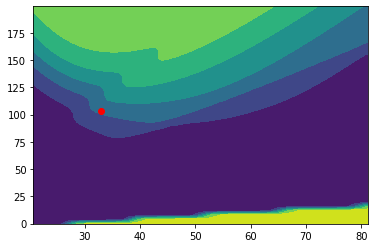

In [199]:
age = 33
bgl = 103
point = torch.Tensor([age, bgl])

pred = model.predict(point)
print("First Prediction, item in center of graph, group 1")
print(pred)
plt.plot([age], [bgl], "or")
plot_decision_boundry(X, y)

First Prediction, item in center of graph, group 1
1


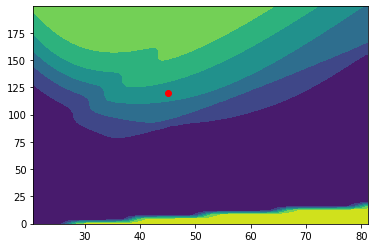

In [202]:
age = 45
bgl = 120
point = torch.Tensor([age, bgl])

pred = model.predict(point)
print("First Prediction, item in center of graph, group 1")
print(pred)
plt.plot([age], [bgl], "or")
plot_decision_boundry(X, y)